# Exploratory data analysis

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 144)

## 1: Synopsis

This exploratory data analysis focus on the dataset from FVCOM simulation, in this dataset, several scnarios are included as below.

* slr_hgt: 4 cases included.

* nbs_case: 2 cases included.

|      Column 	| Description                                                                    	|
|------------:	|--------------------------------------------------------------------------------	|
|       `lat` 	| Lat of points in Tokyo Bay.                                                       |
|       `lon` 	| Lon of points in Tokyo Bay.                                                       |
|   `sigma_z` 	| Sigma Z of points, from 0 to 20, representing sea surface to bottom. 	            |
|   `slr_hgt` 	| SLR hight, from 0 to 2.0 meters, we have 0, 0.2, 1.0, and 2.0 data.            	|
|  `nbs_case` 	| NbS case, we have two case, 1 for reclamation case, 3 for rehabitation case.   	|
| `water_age` 	| The estimated water age by coastal circulation model.                           	|

This EDA is trying to find out the influences of different nbs cases regarding to the slr hight on water age distribution, and changes.

## 2: Data Processing

In [2]:
filename = 'data.csv'
df = pd.read_csv(filename,
                 index_col=False)
df.head()

,lat,lon,sigma_z,slr_hgt,nbs_case,water_age
0,35.259910,139.743604,1,0.0,1,42.48
1,35.259910,139.748108,1,0.0,1,42.63
2,35.264414,139.703063,1,0.0,1,43.42
3,35.264414,139.707568,1,0.0,1,43.19
4,35.264414,139.712072,1,0.0,1,42.96


In [3]:
df.describe()

,lat,lon,sigma_z,slr_hgt,nbs_case,water_age
count,732438.000000,732438.000000,732438.000000,732438.000000,732438.000000,732438.000000
mean,35.482416,139.851687,10.498646,0.824938,2.032259,46.154173
std,0.102229,0.111896,5.765785,0.769314,0.999480,13.919992
min,35.259910,139.626486,1.000000,0.000000,1.000000,0.120000
25%,35.399550,139.761622,5.000000,0.000000,1.000000,38.410000
50%,35.485135,139.847207,10.000000,0.300000,3.000000,47.460000
75%,35.566216,139.941802,15.000000,1.000000,3.000000,54.160000
max,35.696847,140.112973,20.000000,2.000000,3.000000,124.480000


In [4]:
df.isnull().sum()

lat          0
lon          0
sigma_z      0
slr_hgt      0
nbs_case     0
water_age    0
dtype: int64

### 2.1 Heatmap of variables

In [5]:
df.head()

,lat,lon,sigma_z,slr_hgt,nbs_case,water_age
0,35.259910,139.743604,1,0.0,1,42.48
1,35.259910,139.748108,1,0.0,1,42.63
2,35.264414,139.703063,1,0.0,1,43.42
3,35.264414,139.707568,1,0.0,1,43.19
4,35.264414,139.712072,1,0.0,1,42.96


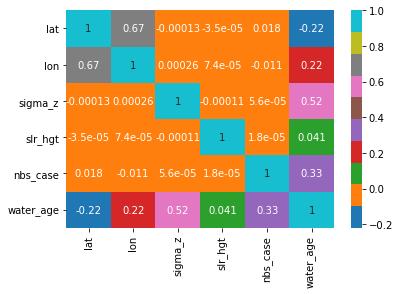

In [6]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='tab10', annot=True);

### 2.2 Histogram of water age

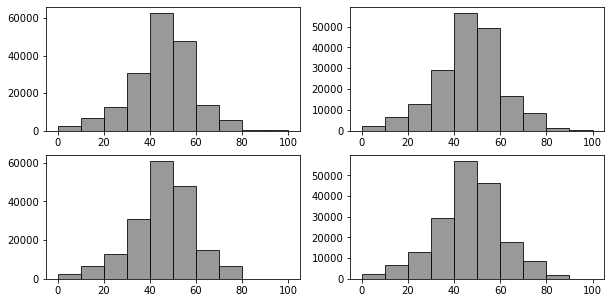

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
axs[0, 0].hist(df[df['slr_hgt']==0.0]['water_age'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[1, 0].hist(df[df['slr_hgt']==0.3]['water_age'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[0, 1].hist(df[df['slr_hgt']==1.0]['water_age'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[1, 1].hist(df[df['slr_hgt']==2.0]['water_age'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
plt.show()

All water age distributions fall into norm, left panels are 0.0 and 0.3, right panels are 1.0 and 2.0.

The peak values of each is roughly increasing form 40-50 to 50-60 days.

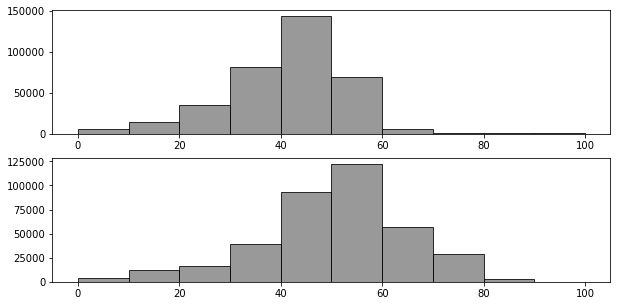

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
axs[0].hist(df[df['nbs_case']==1]['water_age'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[1].hist(df[df['nbs_case']==3]['water_age'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
plt.show()

Also, water age in nbs case 3 has peak value between 50-60, while nbs case 1 is 40-50.

In [9]:
def hisPlot(data=df,col_wrap=2,
            legend_title='NbS',legend_lables=['label 1', 'label 2'],
            savename="hist_nbs.png"):
    plt.clf()
    plt.figure(figsize=(12,6))
    g = sns.displot(data=data, x="water_age", kind="hist", hue="nbs_case", stat="density",
                col="slr_hgt",col_wrap=col_wrap,
                bins = 25,element="step",fill=True,
                palette="colorblind", height=4, aspect=1.5)
    sns.color_palette("husl", 9)
    sns.set(font_scale=1.3)
    plt.xlim(0, 100)
    g.set_axis_labels("Water age (day)", "Density")
    g.set_titles("{col_name} meters of SLR")
    g._legend.set_title(legend_title)
    new_labels = legend_lables
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    plt.savefig(savename,dpi=300)
    plt.show()

In [10]:
def kdePlot(data=df,col_wrap=2,
            legend_title='NbS',legend_lables=['label 1', 'label 2'],
            savename="kde_nbs.png"):
    plt.clf()
    plt.figure(figsize=(12,6))
    g = sns.displot(data=data, x="water_age", kind="kde", hue="nbs_case",
                    col="slr_hgt",col_wrap=col_wrap,
                    fill=True,
                    palette="colorblind", height=4, aspect=1.5)
    sns.color_palette("husl", 9)
    sns.set(font_scale=1.3)
    plt.xlim(0, 100)
    g.set_axis_labels("Water age (day)", "Density")
    g.set_titles("{col_name} meters of SLR")
    g._legend.set_title(legend_title)
    new_labels = legend_lables
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    plt.savefig(savename,dpi=300)
    plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

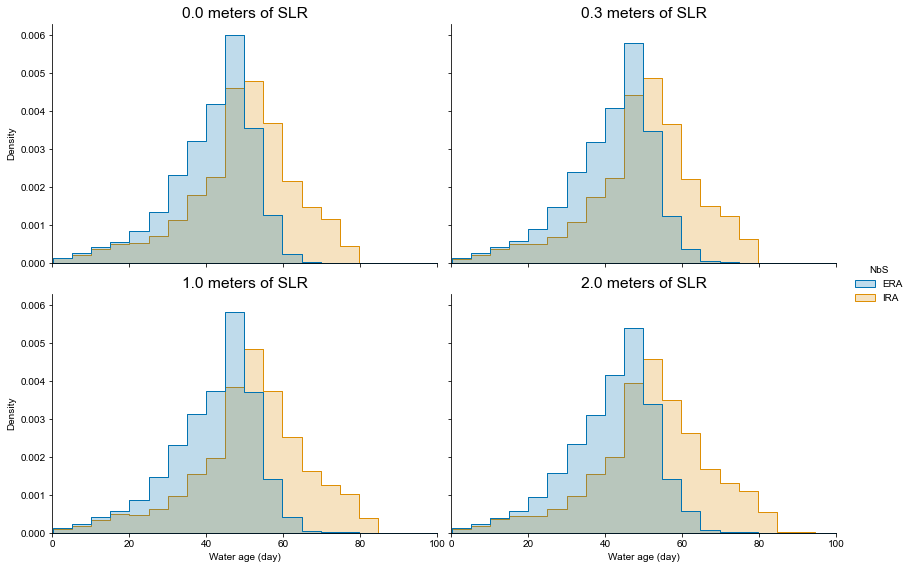

In [11]:
hisPlot(data=df,col_wrap=2,
        legend_title='NbS',legend_lables=['ERA', 'IRA'],
        savename="hist_nbs.png")

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

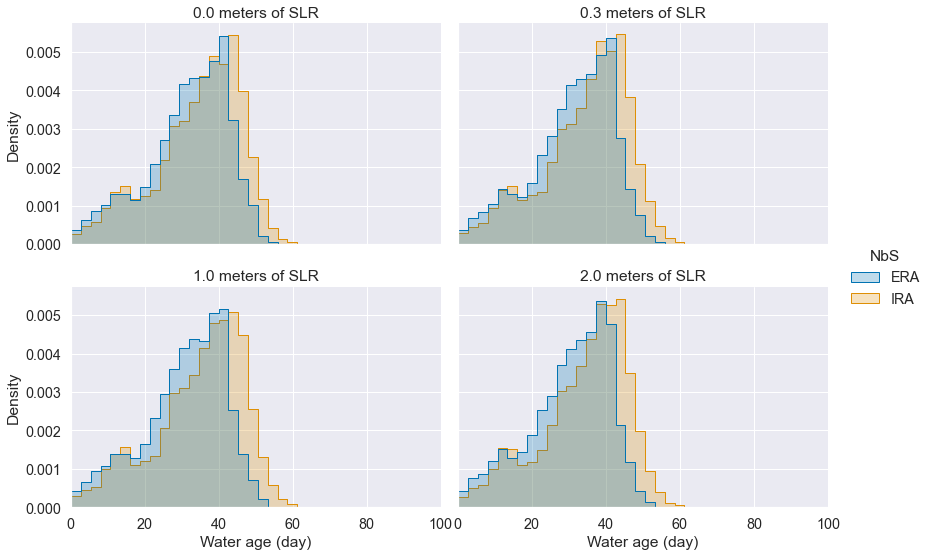

In [12]:
hisPlot(data=df[df.sigma_z == 1],col_wrap=2,
        legend_title='NbS',legend_lables=['ERA', 'IRA'],
        savename="hist_nbs_01.png")

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

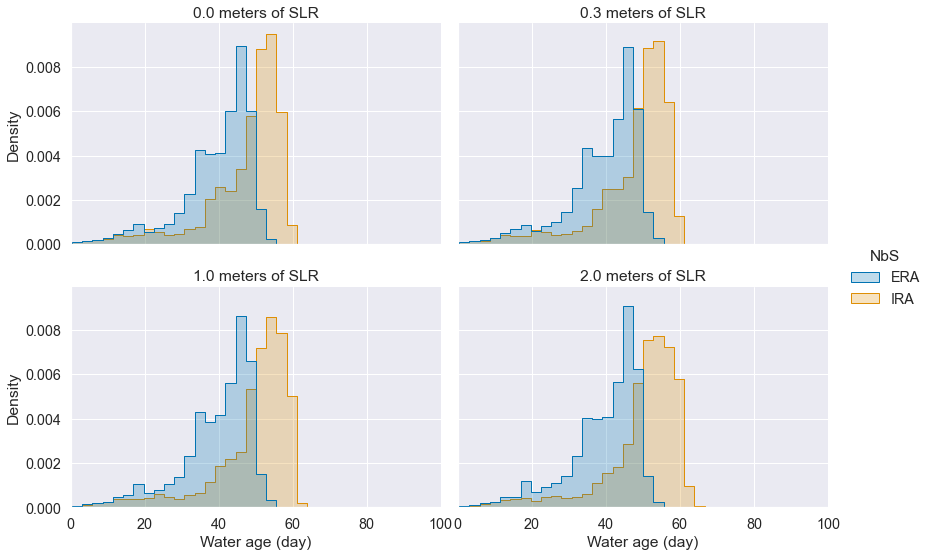

In [13]:
hisPlot(data=df[df.sigma_z == 8],col_wrap=2,
        legend_title='NbS',legend_lables=['ERA', 'IRA'],
        savename="hist_nbs_08.png")

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

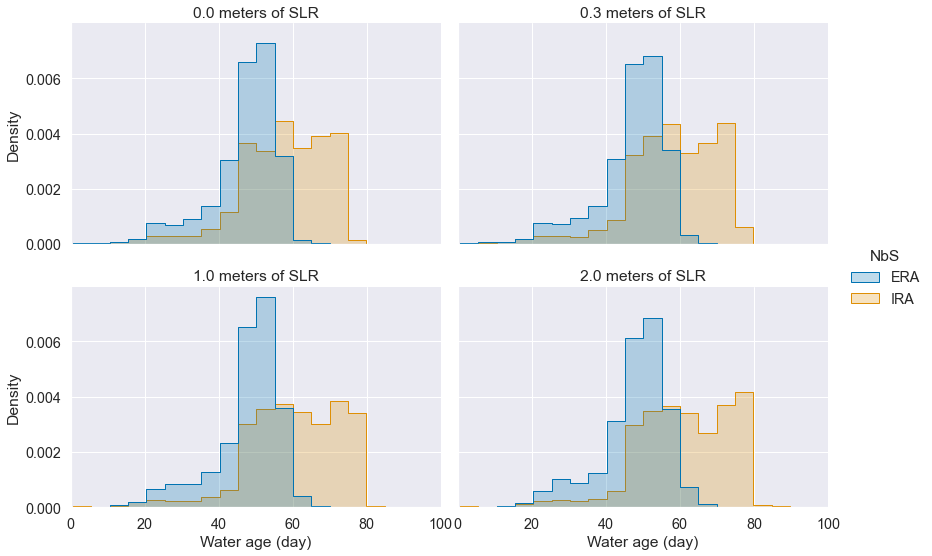

In [14]:
hisPlot(data=df[df.sigma_z == 16],col_wrap=2,
        legend_title='NbS',legend_lables=['ERA', 'IRA'],
        savename="hist_nbs_16.png")

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

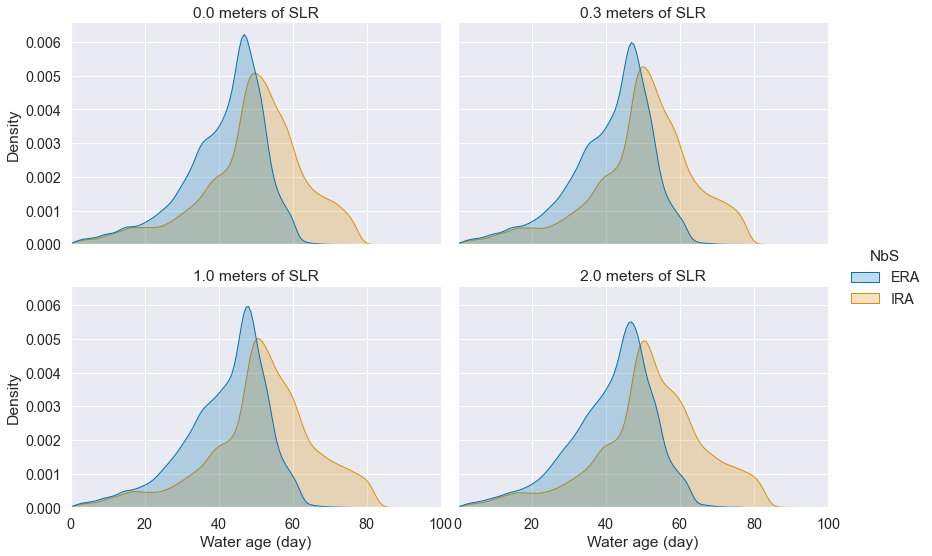

In [15]:
kdePlot(data=df,col_wrap=2,
        legend_title='NbS',legend_lables=['ERA', 'IRA'],
        savename="kde_nbs.png")

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

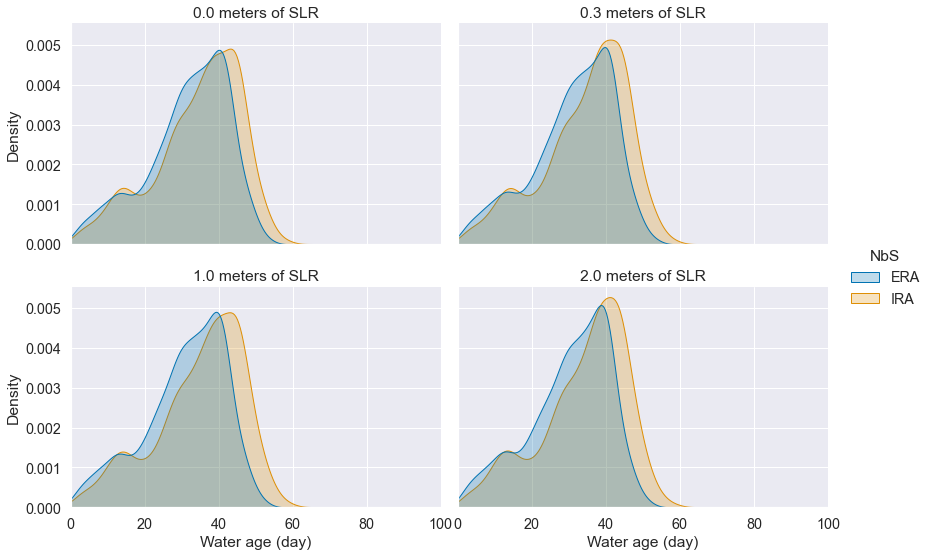

In [16]:
kdePlot(data=df[df.sigma_z == 1],col_wrap=2,
        legend_title='NbS',legend_lables=['ERA', 'IRA'],
        savename="kde_nbs_01.png")

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

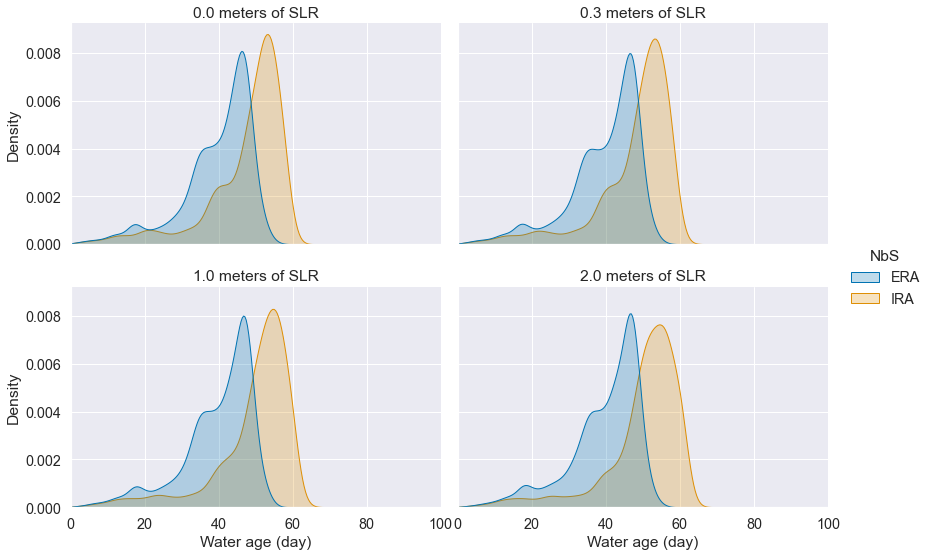

In [17]:
kdePlot(data=df[df.sigma_z == 8],col_wrap=2,
        legend_title='NbS',legend_lables=['ERA', 'IRA'],
        savename="kde_nbs_08.png")

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

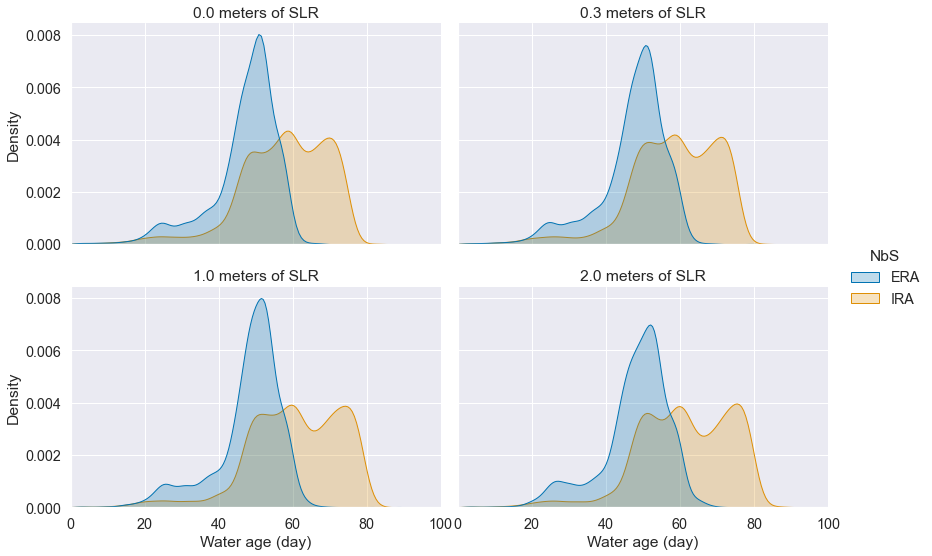

In [18]:
kdePlot(data=df[df.sigma_z == 16],col_wrap=2,
        legend_title='NbS',legend_lables=['ERA', 'IRA'],
        savename="kde_nbs_16.png")

**Review of Histogram**

We plotted histogram of water age of each SLR and NbS case, through all water layers, and the surface, middle, bottom layers.

Here are some findings:

*  Considering the all layers of water, highist frequency group of label 1 and label 2 are 45-50 days and 50-55 days. And Label 1 is a little bit skewed left, Lable 2 is symmetric distributed.

* But for the different layers of water, distribution of water age varies.

1. 考虑不同NbS的情况，Lable 2 的峰值普遍较 Label 1 大，并且随着水深增大，差距增大。例如，表层和中层。

2. 继续深入不同水深，随着水深增加，水龄的分布更加集中（这个现象需要找到对应的英文名词）。

3. 但是，底层水龄出现了特殊的现象。底层的 Label 2 出现了uniform 或者mutimodal分布，这说明 Label 2 底层水龄分布较为均匀。


### 2.3 Jointplot of water age

In [19]:
df_jp = df.rename(columns={"lat": "Lat.", 
                   "lon": "Lon.", 
                   "sigma_z": "Layer", 
                   "slr_hgt": "SLR", 
                   "nbs_case": "NbS", 
                   "water_age": "Water age"}, errors="raise")
df_jp.NbS.replace([1, 3], ['ERA', 'IRA'], inplace=True)

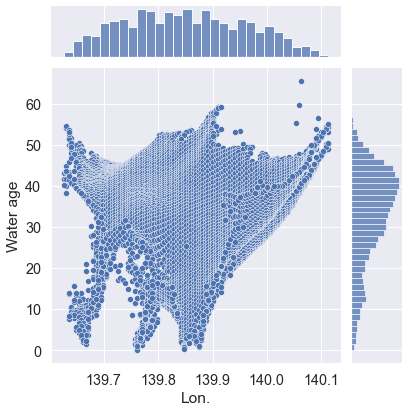

In [20]:
g = sns.jointplot(data=df_jp[(df_jp.Layer==1) & (df_jp.SLR==0)], x="Lon.", y="Water age")

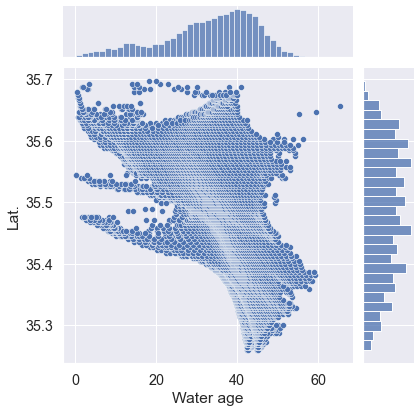

In [21]:
g = sns.jointplot(data=df_jp[(df_jp.Layer==1) & (df_jp.SLR==0)], y="Lat.", x="Water age")

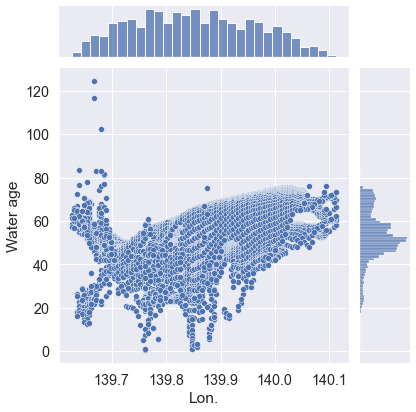

In [22]:
g = sns.jointplot(data=df_jp[(df_jp.Layer==16) & (df_jp.SLR==0)], x="Lon.", y="Water age")

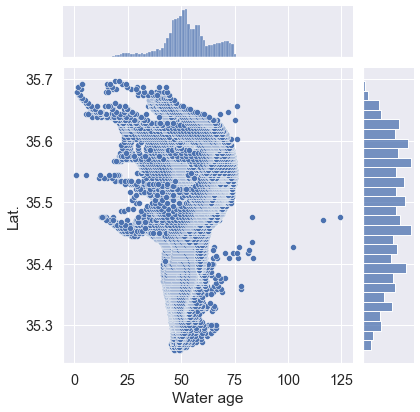

In [23]:
g = sns.jointplot(data=df_jp[(df_jp.Layer==16) & (df_jp.SLR==0)], y="Lat.", x="Water age")

In [24]:
def jointPlot(data=df,xx="lon",yy="water_age",savename="joint_nbs",
              label1="Lon.",label2="Water age (day)"):
    plt.clf()
    g = sns.jointplot(data=df, 
                      x="lon", y="water_age",kind="kde",hue="nbs_case",
                      shade=True,alpha=.5,
                      palette="colorblind")
    sns.set(font_scale=1.3)
    g.set_axis_labels(label1,label2)
    plt.savefig(savename,dpi=300)
    plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

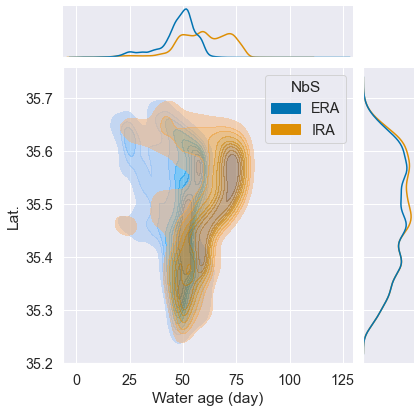

In [25]:
plt.clf()
plt.figure(figsize=(6,6))
g = sns.jointplot(data=df_jp[((df_jp.Layer == 16)) & 
                          ((df_jp.NbS=="ERA") | (df_jp.NbS=="IRA"))], 
                  y="Lat.", x="Water age",kind="kde",hue="NbS",
                  shade=True,alpha=.5,
                  palette="colorblind")
sns.set(font_scale=1.3)
g.set_axis_labels("Water age (day)", "Lat.")
plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

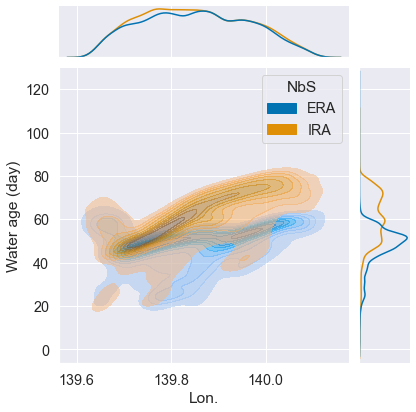

In [26]:
plt.clf()
plt.figure(figsize=(6,6))
g = sns.jointplot(data=df_jp[((df_jp.Layer == 16)) & 
                          ((df_jp.NbS=="ERA") | (df_jp.NbS=="IRA"))], 
                  y="Water age", x="Lon.",kind="kde",hue="NbS",
                  shade=True,alpha=.5,
                  palette="colorblind")
sns.set(font_scale=1.3)
g.set_axis_labels("Lon.", "Water age (day)")
plt.savefig("joint_nbs_lon_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

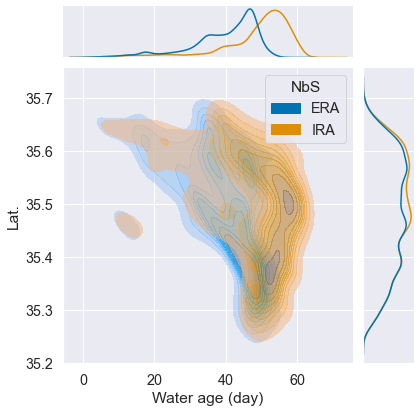

In [27]:
plt.clf()
plt.figure(figsize=(6,6))
g = sns.jointplot(data=df_jp[((df_jp.Layer == 8)) & 
                          ((df_jp.NbS=="ERA") | (df_jp.NbS=="IRA"))], 
                  y="Lat.", x="Water age",kind="kde",hue="NbS",
                  shade=True,alpha=.5,
                  palette="colorblind")
sns.set(font_scale=1.3)
g.set_axis_labels("Water age (day)", "Lat.")
plt.savefig("joint_nbs_lat_08",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

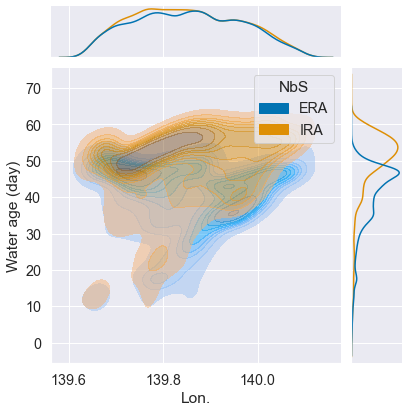

In [28]:
plt.clf()
plt.figure(figsize=(6,6))
g = sns.jointplot(data=df_jp[((df_jp.Layer == 8)) & 
                          ((df_jp.NbS=="ERA") | (df_jp.NbS=="IRA"))], 
                  y="Water age", x="Lon.",kind="kde",hue="NbS",
                  shade=True,alpha=.5,
                  palette="colorblind")
sns.set(font_scale=1.3)
g.set_axis_labels("Lon.", "Water age (day)")
plt.savefig("joint_nbs_lon_08",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

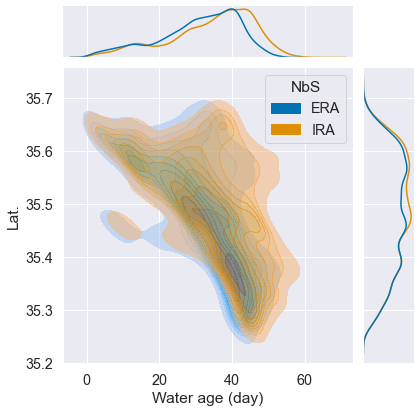

In [29]:
plt.clf()
plt.figure(figsize=(6,6))
g = sns.jointplot(data=df_jp[((df_jp.Layer == 1)) & 
                          ((df_jp.NbS=="ERA") | (df_jp.NbS=="IRA"))], 
                  y="Lat.", x="Water age",kind="kde",hue="NbS",
                  shade=True,alpha=.5,
                  palette="colorblind")
sns.set(font_scale=1.3)
g.set_axis_labels("Water age (day)", "Lat.")
plt.savefig("joint_nbs_lat_01",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

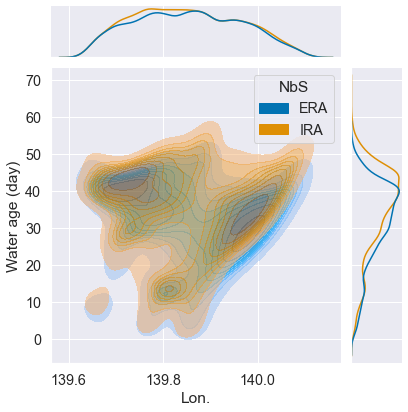

In [30]:
plt.clf()
plt.figure(figsize=(6,6))
g = sns.jointplot(data=df_jp[((df_jp.Layer == 1)) & 
                          ((df_jp.NbS=="ERA") | (df_jp.NbS=="IRA"))], 
                  y="Water age", x="Lon.",kind="kde",hue="NbS",
                  shade=True,alpha=.5,
                  palette="colorblind")
sns.set(font_scale=1.3)
g.set_axis_labels("Lon.", "Water age (day)")
plt.savefig("joint_nbs_lon_01",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

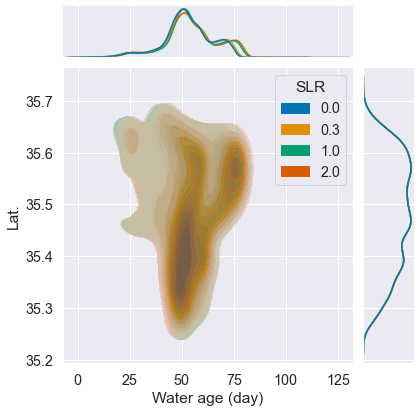

In [31]:
plt.clf()
plt.figure(figsize=(6,6))
g = sns.jointplot(data=df_jp[((df_jp.Layer == 16)) & 
                          ((df_jp.NbS=="ERA") | (df_jp.NbS=="IRA"))], 
                  y="Lat.", x="Water age",kind="kde",hue="SLR",
                  shade=True,alpha=.5,
                  palette="colorblind")
sns.set(font_scale=1.3)
g.set_axis_labels("Water age (day)", "Lat.")
# plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

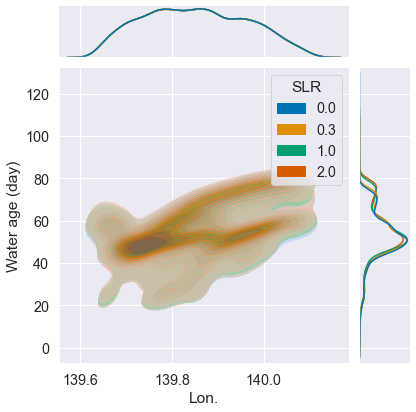

In [32]:
plt.clf()
plt.figure(figsize=(6,6))
g = sns.jointplot(data=df_jp[((df_jp.Layer == 16)) & 
                          ((df_jp.NbS=="ERA") | (df_jp.NbS=="IRA"))], 
                  y="Water age", x="Lon.",kind="kde",hue="SLR",
                  shade=True,alpha=.5,
                  palette="colorblind")
sns.set(font_scale=1.3)
g.set_axis_labels("Lon.", "Water age (day)")
# plt.savefig("joint_nbs_lon_16",dpi=300)
plt.show()

**A summary about jointplot analysis**

试图从空间分布上找到一些规律，在对底层分析的结果中发现，随着经纬度的增加，橙色案例的水龄逐渐增大，这个区域被认为是海湾的东北部。

这个发现是符合常理的。

另一方面，海平面上升的不同情景，从空间上看貌似没有很多的影响。

### 2.4 Boxplot

In [33]:
# mean values of each figure
# Vertical averaged water age value
[[df[(df.nbs_case==1) & (df.slr_hgt==0)].water_age.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==0)].water_age.mean()],
 [df[(df.nbs_case==1) & (df.slr_hgt==0.3)].water_age.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==0.3)].water_age.mean()],
 [df[(df.nbs_case==1) & (df.slr_hgt==1.0)].water_age.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==1.0)].water_age.mean()],
 [df[(df.nbs_case==1) & (df.slr_hgt==2.0)].water_age.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==2.0)].water_age.mean()]]

[[41.294421549155814, 49.319637071602024],
 [41.21155987946244, 49.82838149249277],
 [41.6182754300426, 51.44426928489077],
 [41.4720921097193, 51.85613171206544]]

In [34]:
# mean values of each figure
# Bottom water age value
[[df[(df.nbs_case==1) & (df.slr_hgt==0) & (df.sigma_z==16)].water_age.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==0) & (df.sigma_z==16)].water_age.mean()],
 [df[(df.nbs_case==1) & (df.slr_hgt==0.3) & (df.sigma_z==16)].water_age.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==0.3) & (df.sigma_z==16)].water_age.mean()],
 [df[(df.nbs_case==1) & (df.slr_hgt==1.0) & (df.sigma_z==16)].water_age.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==1.0) & (df.sigma_z==16)].water_age.mean()],
 [df[(df.nbs_case==1) & (df.slr_hgt==2.0) & (df.sigma_z==16)].water_age.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==2.0) & (df.sigma_z==16)].water_age.mean()]]

[[46.87221169036328, 57.470973338976],
 [47.033692168810624, 58.21415996614482],
 [47.798882366222614, 60.40987092678787],
 [47.77093785310728, 61.15884395511349]]

In [35]:
# mean values of each figure
# Surface water age value
[[df[(df.nbs_case==1) & (df.slr_hgt==0) & (df.sigma_z==1)].water_age.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==0) & (df.sigma_z==1)].water_age.mean()],
 [df[(df.nbs_case==1) & (df.slr_hgt==0.3) & (df.sigma_z==1)].water_age.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==0.3) & (df.sigma_z==1)].water_age.mean()],
 [df[(df.nbs_case==1) & (df.slr_hgt==1.0) & (df.sigma_z==1)].water_age.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==1.0) & (df.sigma_z==1)].water_age.mean()],
 [df[(df.nbs_case==1) & (df.slr_hgt==2.0) & (df.sigma_z==1)].water_age.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==2.0) & (df.sigma_z==1)].water_age.mean()]]

[[31.52176709546384, 34.30898857384671],
 [31.014475287745473, 34.34591197630131],
 [30.702351613631258, 34.69542742276775],
 [30.087666440984112, 33.985376639864505]]

<Figure size 432x288 with 0 Axes>

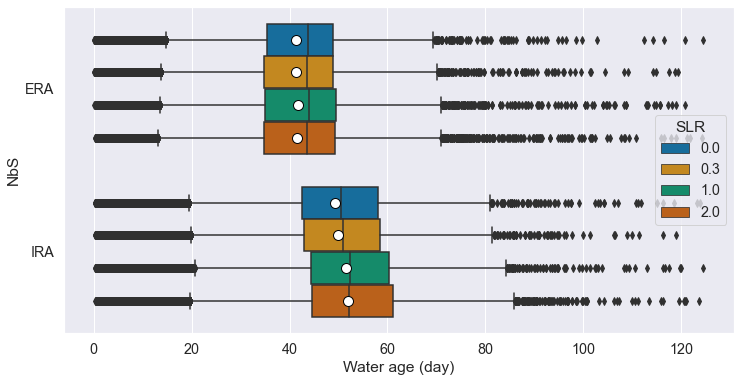

In [36]:
plt.clf()
plt.figure(figsize=(12,6))
g = sns.boxplot(data=df_jp, y="NbS", x="Water age", hue="SLR",
                palette="colorblind",
                dodge=True,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white",
                           "markeredgecolor":"black",
                           "markersize":"10"})
g.legend(loc='center right',ncol=1,title="SLR")
sns.set(font_scale=1.3)
plt.xlabel("Water age (day)")
plt.ylabel("NbS")
#plt.title("SLR Bias in Water age")
plt.savefig("box_slr_bias.png",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

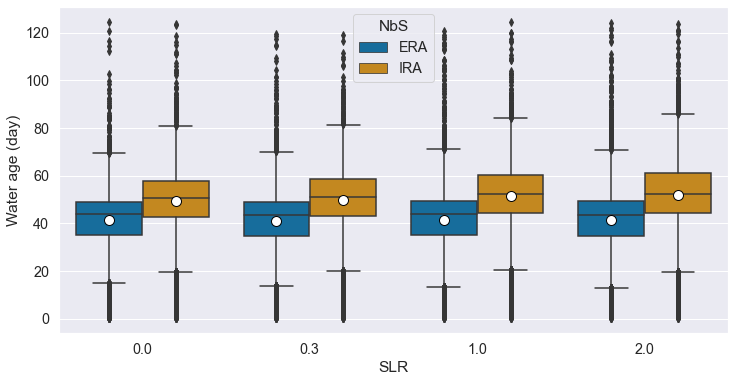

In [37]:
plt.clf()
plt.figure(figsize=(12,6))
g = sns.boxplot(data=df_jp, x="SLR", y="Water age", hue="NbS",
                palette="colorblind",
                dodge=True,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white",
                           "markeredgecolor":"black",
                           "markersize":"10"})
sns.set(font_scale=1.3)
plt.xlabel("SLR")
plt.ylabel("Water age (day)")
#plt.title("SLR Bias in Water age")
plt.savefig("box_nbs_bias.png",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

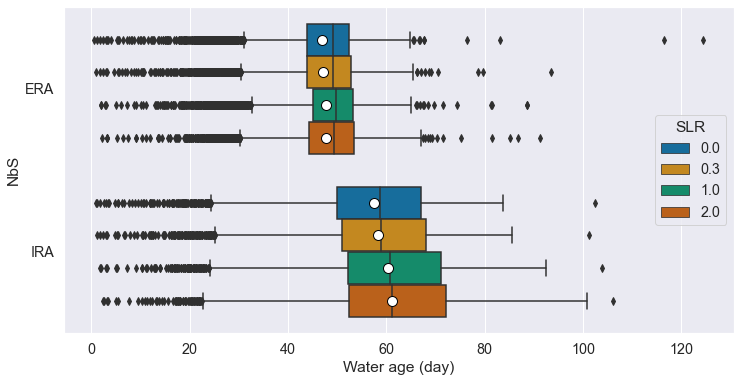

In [38]:
plt.clf()
plt.figure(figsize=(12,6))
g = sns.boxplot(data=df_jp[df_jp.Layer==16], y="NbS", x="Water age", hue="SLR",
                palette="colorblind",
                dodge=True,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white",
                           "markeredgecolor":"black",
                           "markersize":"10"})
g.legend(loc='center right',ncol=1,title="SLR")
sns.set(font_scale=1.3)
plt.xlabel("Water age (day)")
plt.ylabel("NbS")
#plt.title("SLR Bias in Water age")
plt.savefig("box_slr_bias_16.png",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

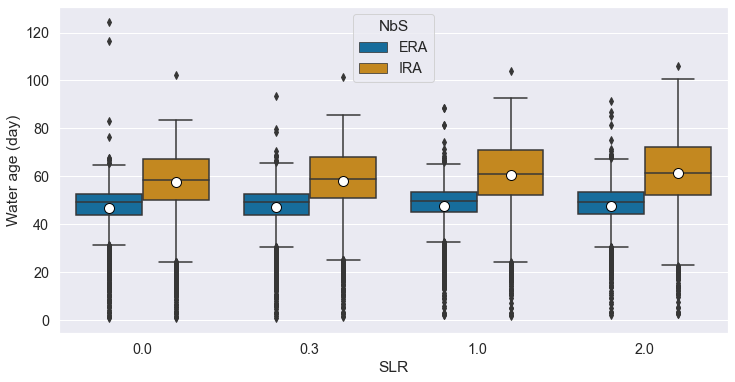

In [39]:
plt.clf()
plt.figure(figsize=(12,6))
g = sns.boxplot(data=df_jp[df_jp.Layer==16], x="SLR", y="Water age", hue="NbS",
                palette="colorblind",
                dodge=True,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white",
                           "markeredgecolor":"black",
                           "markersize":"10"})
sns.set(font_scale=1.3)
plt.xlabel("SLR")
plt.ylabel("Water age (day)")
#plt.title("SLR Bias in Water age")
plt.savefig("box_nbs_bias_16.png",dpi=300)
plt.show()

**A summary about boxplot analysis**

试图从bias上寻找SLR和NbS对水龄的影响。

SLR Bias 似乎没有太大的影响，NbS Bias 能看出显著的区别。

即使是底层水龄，ERA没有什么影响和变化，IRA增加略微较大。说明IRA相比ERA对SLR较为敏感。

现在产生的问题是：水年龄增量在那些方面比较明显？这个风险会突出表现在哪里？

## 3 Furthre Data Analysis

所以，在这一部分，主要分析水龄的增加量。

Baseline设置为SLR=0的case，不再对比分析NbS之间的差异分析。

* slr_hgt: 3 cases included.

* nbs_case: 2 cases included.

|      Column 	| Description                                                                    	|
|------------:	|--------------------------------------------------------------------------------	|
|       `lat` 	| Lat of points in Tokyo Bay.                                                       |
|       `lon` 	| Lon of points in Tokyo Bay.                                                       |
|   `sigma_z` 	| Sigma Z of points, from 0 to 20, representing sea surface to bottom. 	            |
|   `slr_hgt` 	| SLR hight, from 0.3 to 2.0 meters, we have 0.3, 1.0, and 2.0 data.            	|
|  `nbs_case` 	| NbS case, we have two case, 1 for reclamation case, 3 for rehabitation case.   	|
| `water_age_change` 	| The estimated water age change from baseline water age.                           	|


In [40]:
data = {'lat': [], 
        'lon': [], 
        'sigma_z': [], 
        'slr_hgt': [], 
        'nbs_case': [], 
        'water_age_change': []} 
for ss in [3,10,20]:
    for nbs in [1,3]:
        for ll in [var for var in range(1,21)]:
            filepath = '../csv_files2_inner/c{0:02d}{1:02d}_m00_{2:02d}.csv'.format(ss,nbs,ll)
            # print(filepath)
            df = pd.read_csv(filepath,names=['lon','lat','water_age_change'],
                             header=None,index_col=False)
            df['water_age_change'] = pd.to_numeric(df['water_age_change'],errors='coerce')
            data['lat'] += df['lat'].values.tolist()
            data['lon'] += df['lon'].values.tolist()
            data['water_age_change'] += df['water_age_change'].values.tolist()
            data['sigma_z'] += [ll]*df.shape[0]
            data['slr_hgt'] += [ss/10]*df.shape[0]
            data['nbs_case'] += [nbs]*df.shape[0]
data = pd.DataFrame.from_dict(data)
data.head()

,lat,lon,sigma_z,slr_hgt,nbs_case,water_age_change
0,35.259910,139.743604,1,0.3,1,-0.63
1,35.259910,139.748108,1,0.3,1,-0.64
2,35.264414,139.703063,1,0.3,1,-0.67
3,35.264414,139.707568,1,0.3,1,-0.66
4,35.264414,139.712072,1,0.3,1,-0.65


In [41]:
data.isnull().sum()

lat                     0
lon                     0
sigma_z                 0
slr_hgt                 0
nbs_case                0
water_age_change    17700
dtype: int64

In [42]:
data.dropna(subset = ["water_age_change"], inplace=True)
data.drop(data[data['water_age_change'] < -15].index, inplace = True)
data.drop(data[data['water_age_change'] > 35].index, inplace = True)

In [43]:
data.describe()

,lat,lon,sigma_z,slr_hgt,nbs_case,water_age_change
count,550242.000000,550242.000000,550242.000000,550242.000000,550242.000000,550242.000000
mean,35.482729,139.851501,10.495931,1.100072,2.032328,0.980131
std,0.102417,0.111839,5.765660,0.697950,0.999478,1.984822
min,35.259910,139.626486,1.000000,0.300000,1.000000,-14.790000
25%,35.399550,139.761622,5.000000,0.300000,1.000000,-0.160000
50%,35.485135,139.847207,10.000000,1.000000,3.000000,0.520000
75%,35.570721,139.941802,15.000000,2.000000,3.000000,1.440000
max,35.696847,140.112973,20.000000,2.000000,3.000000,34.880000


In [44]:
data.to_csv('data2.csv',index=False)

In [45]:
df = data.copy()

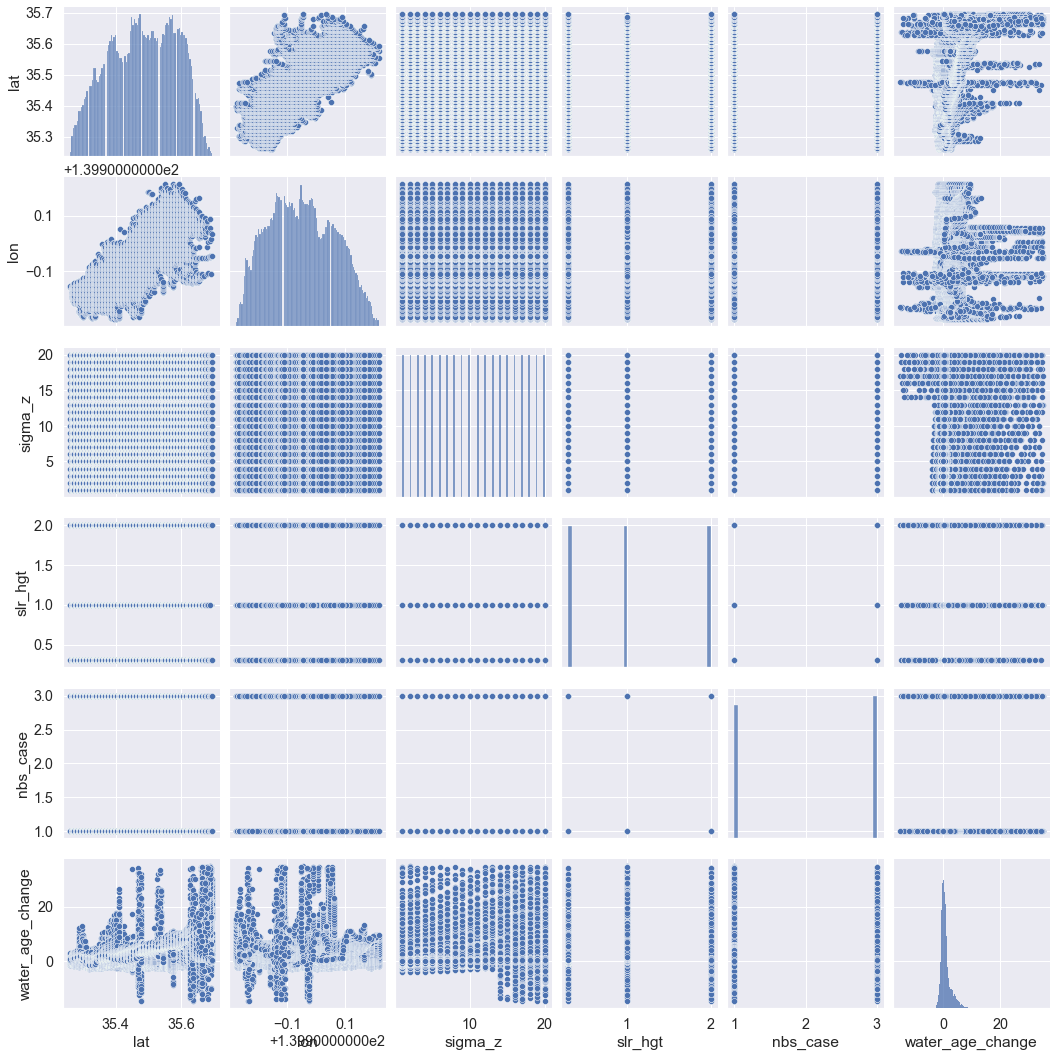

In [46]:
sns.pairplot(df)

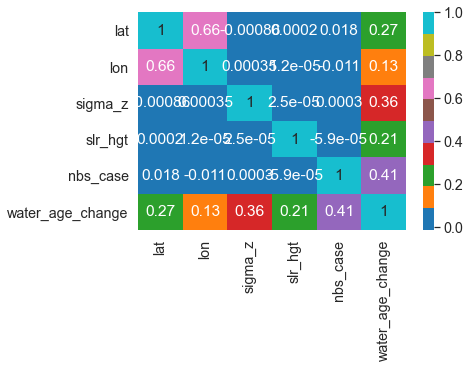

In [47]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='tab10', annot=True);

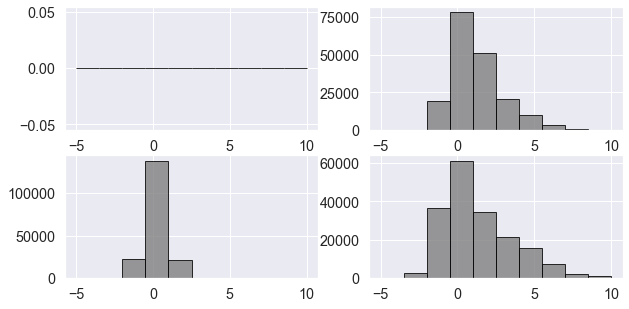

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
axs[0, 0].hist(df[df['slr_hgt']==0.0]['water_age_change'], color='gray', edgecolor='black', alpha=0.8, range=[-5,10])
axs[1, 0].hist(df[df['slr_hgt']==0.3]['water_age_change'], color='gray', edgecolor='black', alpha=0.8, range=[-5,10])
axs[0, 1].hist(df[df['slr_hgt']==1.0]['water_age_change'], color='gray', edgecolor='black', alpha=0.8, range=[-5,10])
axs[1, 1].hist(df[df['slr_hgt']==2.0]['water_age_change'], color='gray', edgecolor='black', alpha=0.8, range=[-5,10])
plt.show()

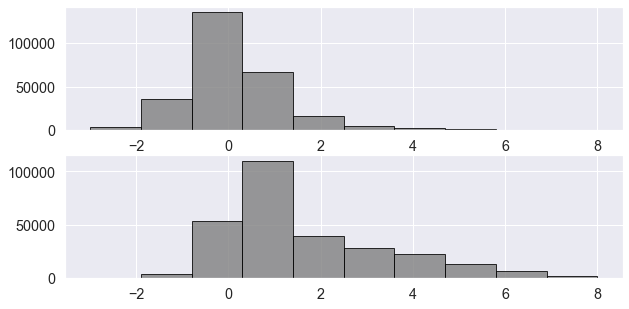

In [49]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
axs[0].hist(df[df['nbs_case']==1]['water_age_change'], color='gray', edgecolor='black', alpha=0.8, range=[-3,8])
axs[1].hist(df[df['nbs_case']==3]['water_age_change'], color='gray', edgecolor='black', alpha=0.8, range=[-3,8])
plt.show()

In [50]:
def hisPlot(data=df,col_wrap=2,
            legend_title='NbS',legend_lables=['label 1', 'label 2'],
            savename="hist_nbs.png"):
    plt.clf()
    plt.figure(figsize=(12,6))
    g = sns.displot(data=data, x="water_age_change", kind="hist", hue="nbs_case", stat="density",
                col="slr_hgt",col_wrap=col_wrap,
                bins = 200,element="step",fill=True,
                palette="colorblind", height=4, aspect=1.5)
    sns.color_palette("husl", 9)
    sns.set(font_scale=1.3)
    plt.xlim(-5, 10)
    g.set_axis_labels("Water age change (day)", "Density")
    g.set_titles("{col_name} meters of SLR")
    g._legend.set_title(legend_title)
    new_labels = legend_lables
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    plt.savefig(savename,dpi=300)
    plt.show()
    
def kdePlot(data=df,col_wrap=2,
            legend_title='NbS',legend_lables=['label 1', 'label 2'],
            savename="kde_nbs.png"):
    plt.clf()
    plt.figure(figsize=(12,6))
    g = sns.displot(data=data, x="water_age_change", kind="kde", hue="nbs_case",
                    col="slr_hgt",col_wrap=col_wrap,
                    fill=True,
                    palette="colorblind", height=4, aspect=1.5)
    sns.color_palette("husl", 9)
    sns.set(font_scale=1.3)
    plt.xlim(-5, 10)
    g.set_axis_labels("Water age change (day)", "Density")
    g.set_titles("{col_name} meters of SLR")
    g._legend.set_title(legend_title)
    new_labels = legend_lables
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    plt.savefig(savename,dpi=300)
    plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

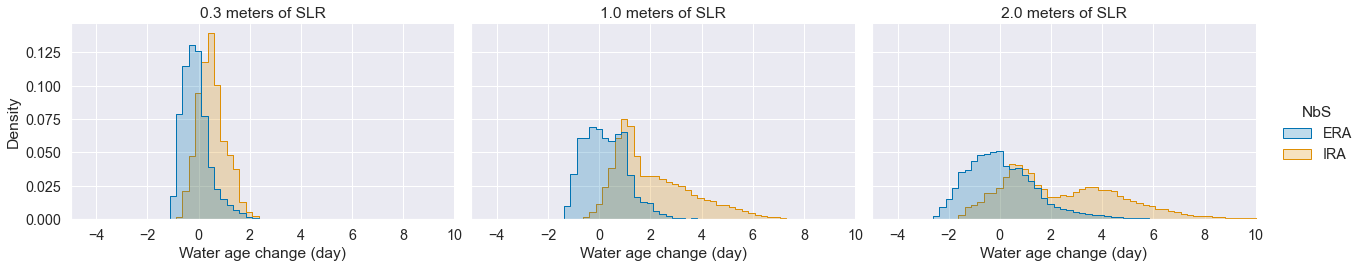

In [51]:
hisPlot(data=df,col_wrap=3,
        legend_title='NbS',legend_lables=['ERA', 'IRA'],
        savename="change_hist_nbs.png")

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

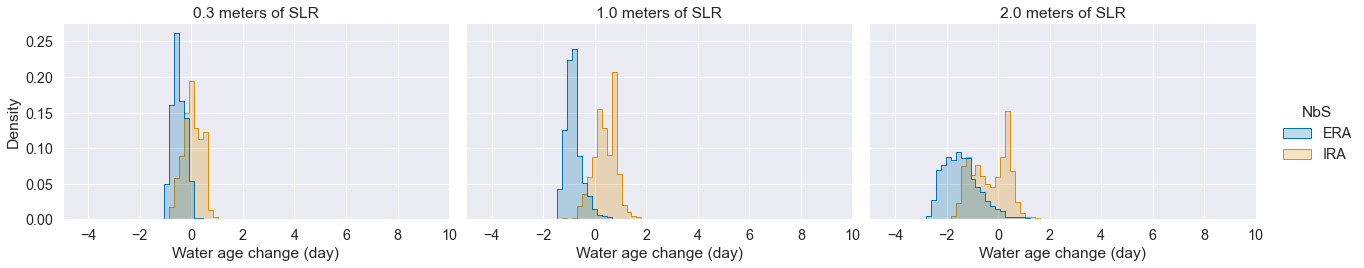

In [52]:
hisPlot(data=df[df.sigma_z == 1],col_wrap=3,
        legend_title='NbS',legend_lables=['ERA', 'IRA'],
        savename="change_hist_nbs_01.png")

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

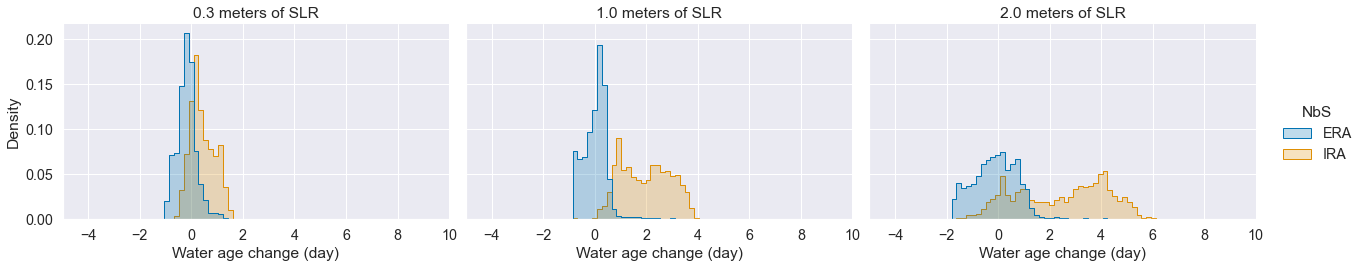

In [53]:
hisPlot(data=df[df.sigma_z == 8],col_wrap=3,
        legend_title='NbS',legend_lables=['ERA', 'IRA'],
        savename="change_hist_nbs_08.png")

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

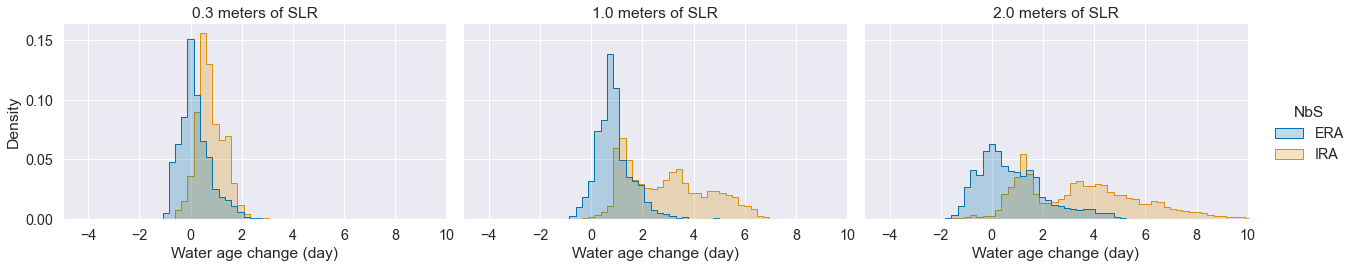

In [54]:
hisPlot(data=df[df.sigma_z == 16],col_wrap=3,
        legend_title='NbS',legend_lables=['ERA', 'IRA'],
        savename="change_hist_nbs_16.png")

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

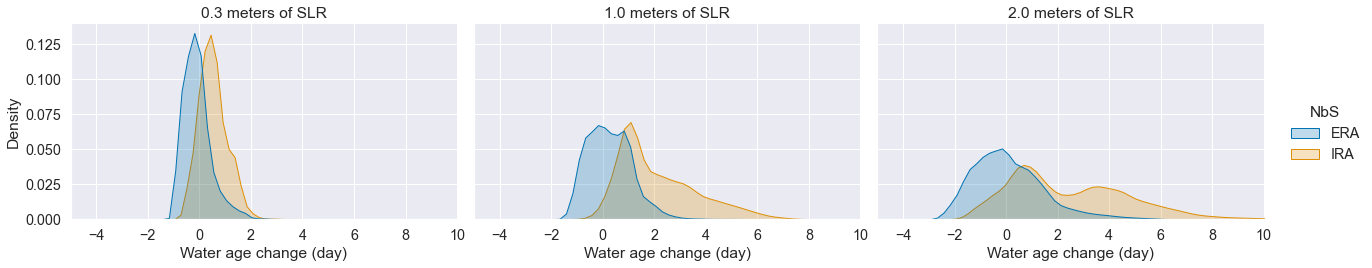

In [55]:
kdePlot(data=df,col_wrap=3,
        legend_title='NbS',legend_lables=['ERA', 'IRA'],
        savename="change_kde_nbs.png")

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

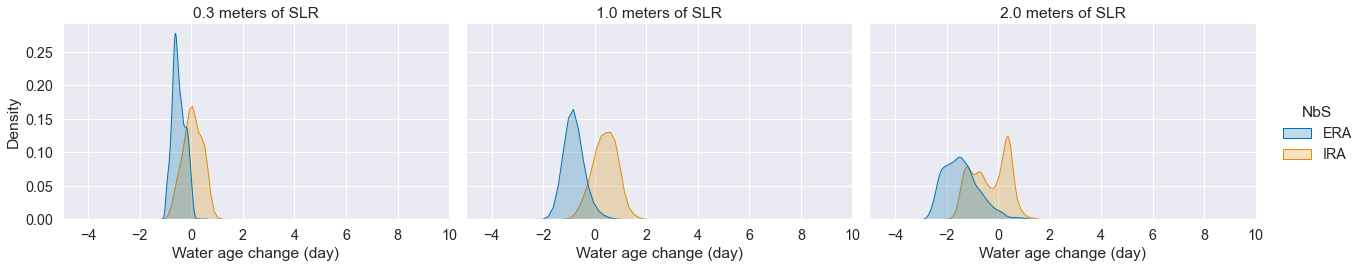

In [56]:
kdePlot(data=df[df.sigma_z == 1],col_wrap=3,
        legend_title='NbS',legend_lables=['ERA', 'IRA'],
        savename="change_kde_nbs_01.png")

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

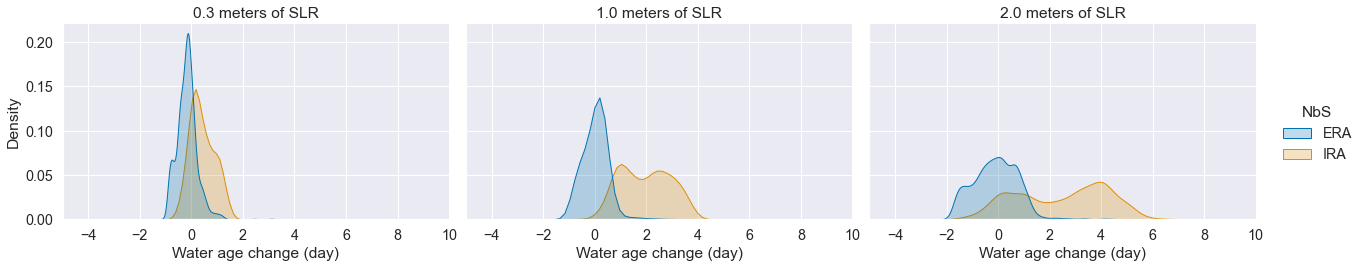

In [57]:
kdePlot(data=df[df.sigma_z == 8],col_wrap=3,
        legend_title='NbS',legend_lables=['ERA', 'IRA'],
        savename="change_kde_nbs_08.png")

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

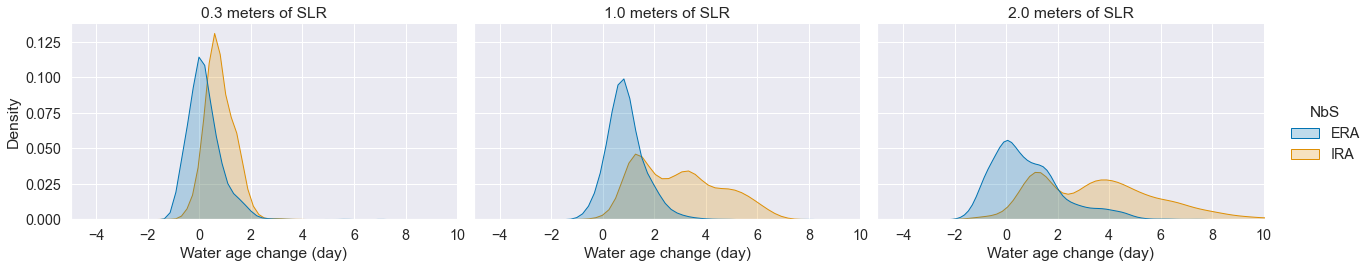

In [58]:
kdePlot(data=df[df.sigma_z == 16],col_wrap=3,
        legend_title='NbS',legend_lables=['ERA', 'IRA'],
        savename="change_kde_nbs_16.png")

In [59]:
df_jp = df.rename(columns={"lat": "Lat.", 
                   "lon": "Lon.", 
                   "sigma_z": "Layer", 
                   "slr_hgt": "SLR", 
                   "nbs_case": "NbS", 
                   "water_age_change": "Water age change"}, errors="raise")
df_jp.NbS.replace([1, 3], ['ERA', 'IRA'], inplace=True)

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

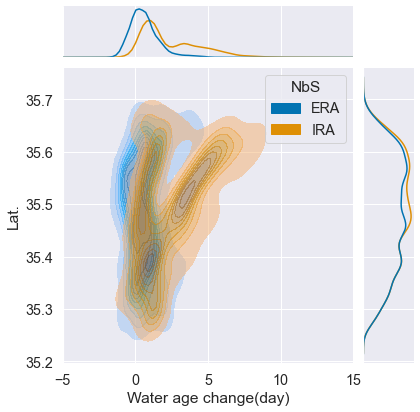

In [60]:
plt.clf()
plt.figure(figsize=(6,6))
g = sns.jointplot(data=df_jp[((df_jp.Layer == 16)) & 
                          ((df_jp.NbS=="ERA") | (df_jp.NbS=="IRA"))], 
                  y="Lat.", x="Water age change",kind="kde",hue="NbS",
                  xlim = (-5,15),
                  shade=True,alpha=.5,
                  palette="colorblind")
sns.set(font_scale=1.3)
g.set_axis_labels("Water age change(day)", "Lat.")
plt.savefig("change_joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

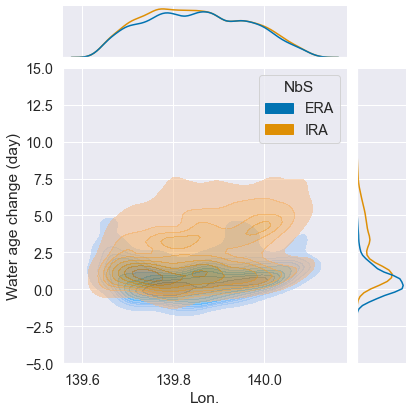

In [61]:
plt.clf()
plt.figure(figsize=(6,6))
g = sns.jointplot(data=df_jp[((df_jp.Layer == 16)) & 
                          ((df_jp.NbS=="ERA") | (df_jp.NbS=="IRA"))], 
                  y="Water age change", x="Lon.",kind="kde",hue="NbS",
                  ylim = (-5,15),
                  shade=True,alpha=.5,
                  palette="colorblind")
sns.set(font_scale=1.3)
g.set_axis_labels("Lon.", "Water age change (day)")
plt.savefig("change_joint_nbs_lon_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

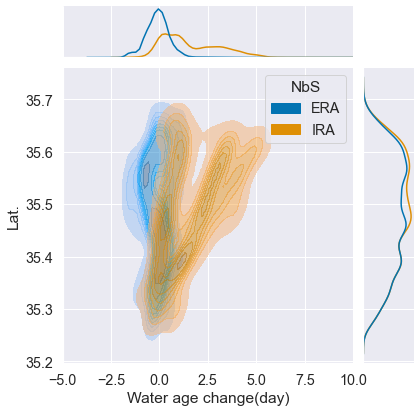

In [62]:
plt.clf()
plt.figure(figsize=(6,6))
g = sns.jointplot(data=df_jp[((df_jp.Layer == 8)) & 
                          ((df_jp.NbS=="ERA") | (df_jp.NbS=="IRA"))], 
                  y="Lat.", x="Water age change",kind="kde",hue="NbS",
                  xlim = (-5,10),
                  shade=True,alpha=.5,
                  palette="colorblind")
sns.set(font_scale=1.3)
g.set_axis_labels("Water age change(day)", "Lat.")
plt.savefig("change_joint_nbs_lat_08",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

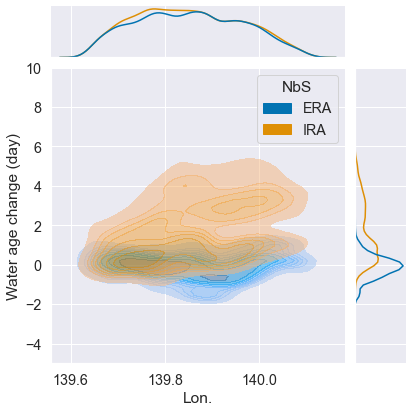

In [63]:
plt.clf()
plt.figure(figsize=(6,6))
g = sns.jointplot(data=df_jp[((df_jp.Layer == 8)) & 
                          ((df_jp.NbS=="ERA") | (df_jp.NbS=="IRA"))], 
                  y="Water age change", x="Lon.",kind="kde",hue="NbS",
                  ylim = (-5,10),
                  shade=True,alpha=.5,
                  palette="colorblind")
sns.set(font_scale=1.3)
g.set_axis_labels("Lon.", "Water age change (day)")
plt.savefig("change_joint_nbs_lon_08",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

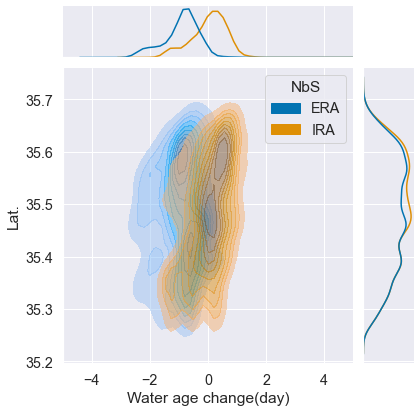

In [64]:
plt.clf()
plt.figure(figsize=(6,6))
g = sns.jointplot(data=df_jp[((df_jp.Layer == 1)) & 
                          ((df_jp.NbS=="ERA") | (df_jp.NbS=="IRA"))], 
                  y="Lat.", x="Water age change",kind="kde",hue="NbS",
                  xlim = (-5,5),
                  shade=True,alpha=.5,
                  palette="colorblind")
sns.set(font_scale=1.3)
g.set_axis_labels("Water age change(day)", "Lat.")
plt.savefig("change_joint_nbs_lat_01",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

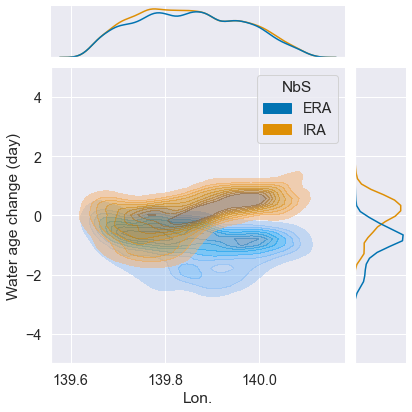

In [65]:
plt.clf()
plt.figure(figsize=(6,6))
g = sns.jointplot(data=df_jp[((df_jp.Layer == 1)) & 
                          ((df_jp.NbS=="ERA") | (df_jp.NbS=="IRA"))], 
                  y="Water age change", x="Lon.",kind="kde",hue="NbS",
                  ylim = (-5,5),
                  shade=True,alpha=.5,
                  palette="colorblind")
sns.set(font_scale=1.3)
g.set_axis_labels("Lon.", "Water age change (day)")
plt.savefig("change_joint_nbs_lon_01",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

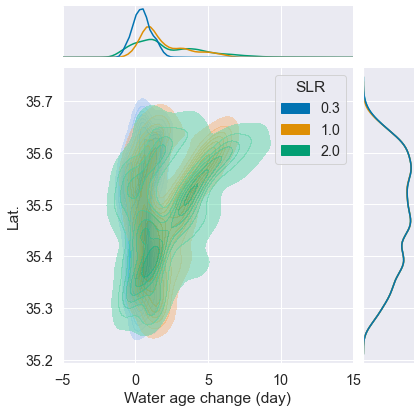

In [66]:
plt.clf()
plt.figure(figsize=(6,6))
g = sns.jointplot(data=df_jp[((df_jp.Layer == 16)) & 
                          ((df_jp.NbS=="ERA") | (df_jp.NbS=="IRA"))], 
                  y="Lat.", x="Water age change",kind="kde",hue="SLR",
                  xlim = (-5,15),
                  shade=True,alpha=.5,
                  palette="colorblind")
sns.set(font_scale=1.3)
g.set_axis_labels("Water age change (day)", "Lat.")
# plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

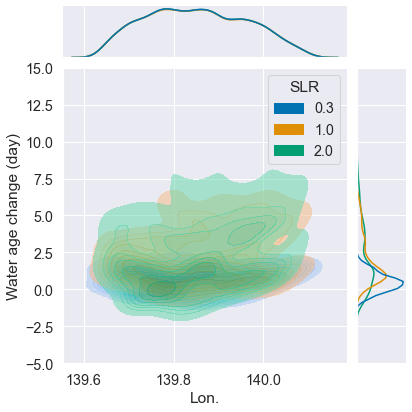

In [67]:
plt.clf()
plt.figure(figsize=(6,6))
g = sns.jointplot(data=df_jp[((df_jp.Layer == 16)) & 
                          ((df_jp.NbS=="ERA") | (df_jp.NbS=="IRA"))], 
                  y="Water age change", x="Lon.",kind="kde",hue="SLR",
                  ylim = (-5,15),
                  shade=True,alpha=.5,
                  palette="colorblind")
sns.set(font_scale=1.3)
g.set_axis_labels("Lon.", "Water age change (day)")
# plt.savefig("joint_nbs_lon_16",dpi=300)
plt.show()

In [68]:
# mean values of each figure
# Vertical averaged water age value
[[df[(df.nbs_case==1) & (df.slr_hgt==0.3)].water_age_change.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==0.3)].water_age_change.mean()],
 [df[(df.nbs_case==1) & (df.slr_hgt==1.0)].water_age_change.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==1.0)].water_age_change.mean()],
 [df[(df.nbs_case==1) & (df.slr_hgt==2.0)].water_age_change.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==2.0)].water_age_change.mean()]]

[[-0.07257252535714175, 0.5781493479086685],
 [0.36815042738903403, 2.198906891588653],
 [0.14510958518602568, 2.508573629829751]]

In [69]:
# mean values of each figure
# Bottom water age value
[[df[(df.nbs_case==1) & (df.slr_hgt==0.3) & (df.sigma_z==16)].water_age_change.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==0.3) & (df.sigma_z==16)].water_age_change.mean()],
 [df[(df.nbs_case==1) & (df.slr_hgt==1.0) & (df.sigma_z==16)].water_age_change.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==1.0) & (df.sigma_z==16)].water_age_change.mean()],
 [df[(df.nbs_case==1) & (df.slr_hgt==2.0) & (df.sigma_z==16)].water_age_change.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==2.0) & (df.sigma_z==16)].water_age_change.mean()]]

[[0.24800225479143176, 0.8161579058475819],
 [1.0149920724801869, 3.0174549692731465],
 [0.8616805774870275, 3.601195606252644]]

In [70]:
# mean values of each figure
# Surface water age value
[[df[(df.nbs_case==1) & (df.slr_hgt==0.3) & (df.sigma_z==1)].water_age_change.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==0.3) & (df.sigma_z==1)].water_age_change.mean()],
 [df[(df.nbs_case==1) & (df.slr_hgt==1.0) & (df.sigma_z==1)].water_age_change.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==1.0) & (df.sigma_z==1)].water_age_change.mean()],
 [df[(df.nbs_case==1) & (df.slr_hgt==2.0) & (df.sigma_z==1)].water_age_change.mean(),
  df[(df.nbs_case==3) & (df.slr_hgt==2.0) & (df.sigma_z==1)].water_age_change.mean()]]

[[-0.5013816381638199, 0.08844481958219029],
 [-0.7262054979720608, 0.4576654683865532],
 [-1.4301350135013517, -0.3239776324119016]]

<Figure size 432x288 with 0 Axes>

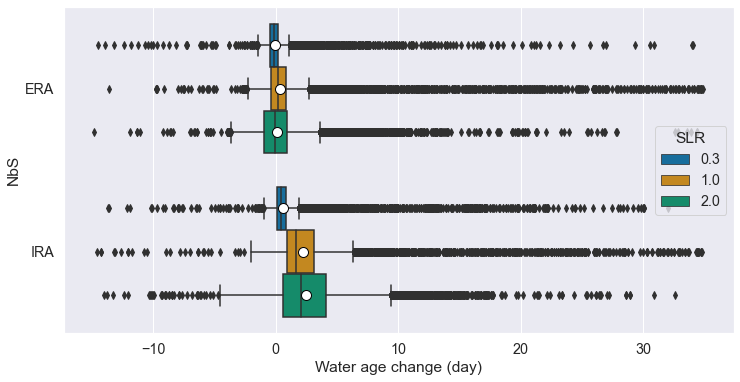

In [71]:
plt.clf()
plt.figure(figsize=(12,6))
g = sns.boxplot(data=df_jp, y="NbS", x="Water age change", hue="SLR",
                palette="colorblind",
                dodge=True,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white",
                           "markeredgecolor":"black",
                           "markersize":"10"})
g.legend(loc='center right',ncol=1,title="SLR")
sns.set(font_scale=1.3)
plt.xlabel("Water age change (day)")
plt.ylabel("NbS")
#plt.title("SLR Bias in Water age")
plt.savefig("change_box_slr_bias.png",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

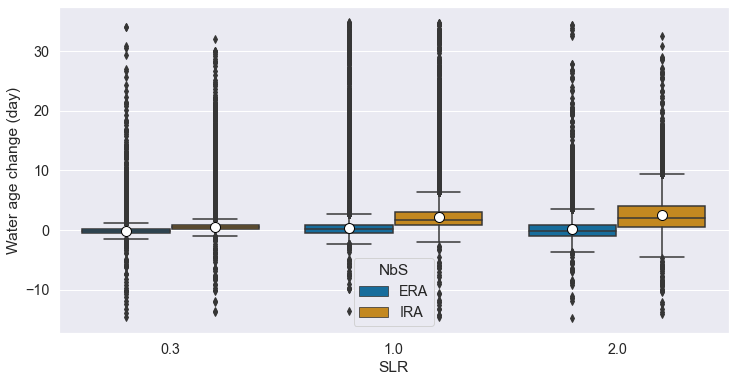

In [72]:
plt.clf()
plt.figure(figsize=(12,6))
g = sns.boxplot(data=df_jp, x="SLR", y="Water age change", hue="NbS",
                palette="colorblind",
                dodge=True,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white",
                           "markeredgecolor":"black",
                           "markersize":"10"})
sns.set(font_scale=1.3)
plt.xlabel("SLR")
plt.ylabel("Water age change (day)")
#plt.title("SLR Bias in Water age")
plt.savefig("change_box_nbs_bias.png",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

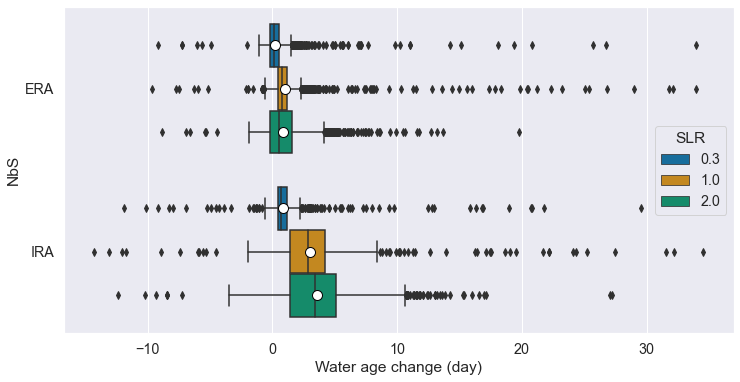

In [73]:
plt.clf()
plt.figure(figsize=(12,6))
g = sns.boxplot(data=df_jp[df_jp.Layer==16], y="NbS", x="Water age change", hue="SLR",
                palette="colorblind",
                dodge=True,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white",
                           "markeredgecolor":"black",
                           "markersize":"10"})
g.legend(loc='center right',ncol=1,title="SLR")
sns.set(font_scale=1.3)
plt.xlabel("Water age change (day)")
plt.ylabel("NbS")
#plt.title("SLR Bias in Water age")
plt.savefig("change_box_slr_bias_16.png",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

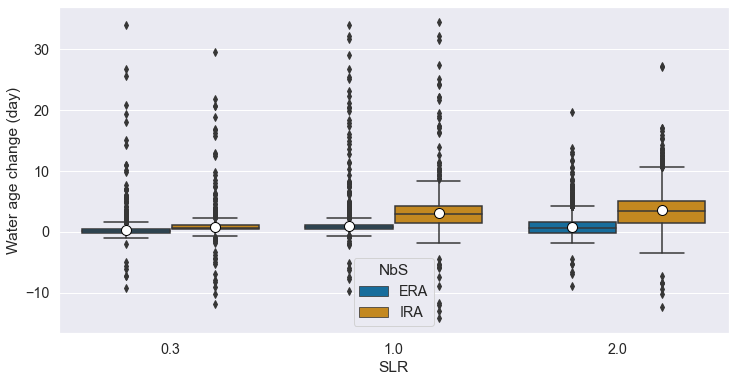

In [74]:
plt.clf()
plt.figure(figsize=(12,6))
g = sns.boxplot(data=df_jp[df_jp.Layer==16], x="SLR", y="Water age change", hue="NbS",
                palette="colorblind",
                dodge=True,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white",
                           "markeredgecolor":"black",
                           "markersize":"10"})
sns.set(font_scale=1.3)
plt.xlabel("SLR")
plt.ylabel("Water age change (day)")
#plt.title("SLR Bias in Water age")
plt.savefig("change_box_nbs_bias_16.png",dpi=300)
plt.show()